<a href="https://colab.research.google.com/github/hundong2/Quantum/blob/main/%EB%A7%88%ED%8B%B4_%EC%A0%9C1%ED%9A%8C_%ED%80%80%ED%85%80AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Machine learning / 퀀텀AI 경진대회 참가

안녕하세요, 마틴입니다. 양자컴퓨팅에 관심을 가지고 있던 중 이렇게 좋은 기회로 경진대회에 참가할 수 있어 기쁜 마음입니다.

이 노트북에는, 경진대회 참가 기본 가이드에 추가하여 경진대회 참가를 위해 수집/학습한 정보들 및 성능향상을 위한 코드와 그 설명을 포함하고 있습니다.


# 퀀텀AI란?

양자컴퓨팅 기술을 인공지능(AI)에 적용하거나, 양자역학적 원리를 기반으로 한 새로운 형태의 AI 알고리즘으로,
1. `기존 AI 알고리즘을 양자컴퓨터에서 실행`하여 성능을 높이는 방식과

> 예를 들어, 양자 지원 신경망(QNN), 양자 강화학습(QRL), 양자 서포트 벡터머신(QSVM) 등


2. `양자역학의 중첩, 얽힘, 불확정성 등 개념을 차용`하여 기존 모델을 더 유연하고 창의적으로 설계하는 방식이 존재합니다.

## QML Framework

양자컴퓨팅 기반의 머신러닝 프레임워크를 QML framework이라고 부릅니다.

대표적으로,
1. `PennyLane`: Xanadu에서 개발. PyTorch, TensorFlow와 연동 가능
2. `Qiskit Machine Learning`: IBM의 Qiskit에 포함된 모듈
3. `TensorFlow Quantum`: Google이 개발한 양자 딥러닝 프레임워크
4. `Strawberry Fields`: 광학 기반 양자기계학습 플랫폼 (Xanadu)

등이 존재합니다.


> 경진대회 기본 가이드에서는 PennyLane을 사용할 것을 추천 합니다.
Pennylane에 대한 Tutorial과 자세한 사항들은 [Pennylane codebook](https://pennylane.ai/codebook)과 [Demos](https://pennylane.ai/search/?contentType=DEMO&categories=how-to&sort=publication_date) 를 참고하세요.



### pennylane의 설치

In [ ]:
!pip install pennylane

## 주요 개념 설명
`Qubit (큐비트)`: 양자 정보를 담는 최소 단위. 0과 1 상태의 중첩(superposition)이 가능

`Gate (게이트)`: 큐비트에 작용하는 연산. 예: H, X, S, CNOT


> 1. Hadamard 게이트 (H):
큐비트를 중첩 상태(Superposition)로 만듭니다. 비유하자면, 동전을 던지기 전, 앞면과 뒷면이 모두 가능한 50:50 상태로 만든다고 보면 됩니다.
  
> 2. Pauli-X 게이트 (X):
고전 컴퓨터의 NOT 게이트에 해당합니다. |0⟩ ↔ |1⟩를 서로 바꿉니다.

> 3. S 게이트 (Phase 게이트): 큐비트의 상태에 위상을 추가합니다. |0⟩은 그대로, |1⟩은 π/2 (90도) 회전. 위상 게이트는 얽힘 회로 설계나 간섭 실험에서 중요하게 사용됩니다.

> 4. CNOT 게이트 (Controlled-X): 두 큐비트를 사용하는 제어 게이트입니다. 	첫 번째 큐비트(제어 큐비트)가 |1⟩일 때만, 두 번째 큐비트(타겟 큐비트)에 X 게이트를 적용합니다. 얽힘 상태(Bell state)를 만드는 데 핵심적으로 쓰입니다.

`Quantum Circuit`: 여러 게이트가 순서대로 연결된 흐름. 고전 회로와 유사하지만 양자적 효과 존재
Device
회로를 실행할 양자 컴퓨터 또는 시뮬레이터 (default.qubit, qiskit.aer, 등)

`QNode (Quantum Node)`: Python 함수로 표현된 회로. Autograd 등과 연동 가능

`Measurement`: 회로를 끝내고 확률 또는 상태를 관측하는 부분. qml.expval, qml.probs 등


## 양자 회로 설계하기

### Backend (시뮬레이터 디바이스)

Backend는 실제 양자 회로를 구동하는 시뮬레이터, 혹은 양자 컴퓨터입니다. 한 개의 회로를 어느 기기에서 돌릴 지 미리 선언을 해주어야 합니다.


**Backend 선택하기**

다양한 Backend를 양자 회로를 돌리는 데 사용할 수 있습니다. Pennylaned의 `default.qubit`, `lightning.qubit`등 뿐만 아니라, Qiskit, IQM 등 실제 양자 컴퓨터의 Backend interface를 가져와 사용할 수도 있습니다.
그러나, QML을 구현하고 시험해 볼 때는 `default.qubit`이 권장됩니다. 다른 ML 프레임워크와의 결합도 간편할 뿐더러 가장 빠른 differentiation 방법을 제공합니다.

Backend 선택과 개별 device에 대한 정보는 Pennylane의 공식 문서: [Quantum Devices](https://pennylane.ai/devices)를 참고하세요.

### 기본 회로 설계

In [ ]:
# PennyLane을 qml이라는 이름으로 import합니다. QML = Quantum Machine Learning의 약자입니다.
import pennylane as qml

# numpy도 함께 사용 (수학 연산, 배열 처리 등)
import numpy as np

# 시뮬레이터 디바이스 정의: default.qubit은 PennyLane에서 제공하는 기본 양자 시뮬레이터입니다.
# wires=3은 3개의 큐비트(0, 1, 2번)를 사용할 것임을 의미합니다.
dev = qml.device("default.qubit", wires=3)

# 양자 회로를 정의하는 QNode입니다. 데코레이터 @qml.qnode(dev)를 사용해 QNode로 등록합니다.
@qml.qnode(dev)
def circuit():
    # 0번 큐비트에 Hadamard 게이트를 적용합니다. (|0⟩ → (|0⟩ + |1⟩)/√2)
    qml.Hadamard(wires=0)

    # 0번 큐비트에 S 게이트를 적용합니다. (Z축 회전, 위상 추가)
    qml.S(wires=0)

    # 1번 큐비트에 Hadamard 게이트를 적용합니다. 상태를 중첩시킵니다.
    qml.Hadamard(wires=1)

    # 2번 큐비트에도 Hadamard 게이트를 적용합니다.
    qml.Hadamard(wires=2)

    # 회로의 출력을 확률(probability) 분포로 반환합니다.
    # 총 3개의 큐비트 → 2^3 = 8개의 상태에 대한 확률을 리턴합니다.
    return qml.probs(wires=[0, 1, 2])

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


### 양자 회로 그리기

In [ ]:
print(qml.draw(circuit)())

# 회로의 확률분포를 시각화 하고 총 합을 확인해 볼 수 있습니다.
probs = circuit()
print("측정 확률 분포:", probs)
print("총합 확인:", np.sum(probs))  # 항상 1이어야 합니다.

0: ──H──S─┤ ╭Probs
1: ──H────┤ ├Probs
2: ──H────┤ ╰Probs
측정 확률 분포: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
총합 확인: 0.9999999999999996


(<Figure size 500x400 with 1 Axes>, <Axes: >)

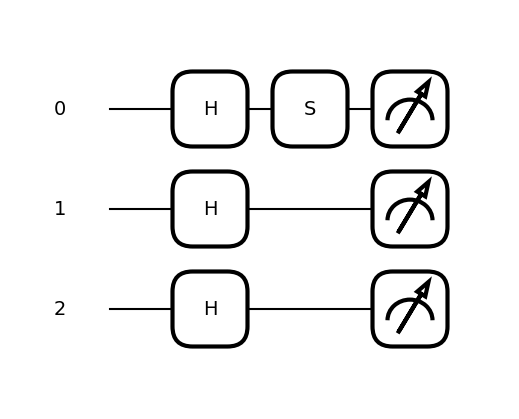

In [ ]:
qml.draw_mpl(circuit)()

|양자 회로| ML|
|:--:|:--:|
|Quantum Circuit| Layer, ML Module|
|Backend | device(CPU, CUDA, ...)|

### 양자얽힘 상태 만들어보기
**양자 얽힘 상태(Entangled State)**는 양자 컴퓨팅의 핵심 개념 중 하나이며, 직접 회로를 만들어보면 이해하기 훨씬 좋을 것 같습니다.

가장 기본적인 상태는 Bell상태 입니다. 쉽게 설명해 보면, 주머니에 두 개의 동전이 있고 동전은 마법처럼 연결되어 있어서, 어디에 떨어뜨리든 둘 다 같은 면이 나옵니다. 예를 들어, 회사에서 동전을 던졌는데 앞면이 나왔다면, 아내가 집에서 던진 동전도 반드시 앞면이 나옵니다. 심지어 둘이 서로 동전의 결과를 말하기 전까지는 앞인지 뒷면인지 아무도 알 수 없습니다.

확률적으로는,
- 두 큐비트가 둘 다 0일 확률 = 50%
- 둘 다 1일 확률 = 50%
- 그런데 하나가 0이고, 하나가 1일 가능성은 전혀 없음

이런, Bell 상태를 생성하고 확인해 보겠습니다.

In [ ]:
# 2개의 큐비트를 사용하는 시뮬레이터
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def bell_circuit():
    # Hadamard 게이트로 0번 큐비트를 중첩시킴
    qml.Hadamard(wires=0)

    # CNOT 게이트로 0번 큐비트와 1번 큐비트를 얽음
    # 0번이 제어, 1번이 타겟인 CNOT 게이트
    qml.CNOT(wires=[0, 1])

    # 두 큐비트의 상태를 추출
    return qml.state()

In [ ]:
# 회로 실행
state = bell_circuit()

# 출력: 양자 상태 벡터
print("양자 상태 (State vector):", state)

# 확률로 확인 (|00>, |01>, |10>, |11>)
probs = np.abs(state) ** 2
for i, p in enumerate(probs):
    print(f"|{i:02b}>: {p:.4f}")

양자 상태 (State vector): [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|00>: 0.5000
|01>: 0.0000
|10>: 0.0000
|11>: 0.5000


In [ ]:
# 상태 시각화
print(qml.draw(bell_circuit)())

0: ──H─╭●─┤  State
1: ────╰X─┤  State


### 간단한 분류모델 만들어보기
파라미터화된 양자 회로(Variational Quantum Circuit, VQC)**로 간단한 **이진 분류 문제(binary classification)**를 풀어보는 예제를 만들어 보겠습니다.

In [ ]:
!pip install matplotlib

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터셋 (2차원, 라벨 0 or 1)
X = np.array([[0.1, 0.2], [0.2, 0.1], [3.0, 3.1], [3.2, 3.3]])
Y = np.array([0, 0, 1, 1])  # 클래스 라벨

# 2. 디바이스 설정
dev = qml.device("default.qubit", wires=1)


In [ ]:
# 3. 파라미터화된 회로 (특성 주입 + 분류 회로)
@qml.qnode(dev)
def circuit(x, weights):
    # 특성 주입 (feature embedding)
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=0)

    # 파라미터화된 회로
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=0)
    qml.RZ(weights[2], wires=0)

    # 측정 (Z 방향 기대값)
    return qml.expval(qml.PauliZ(0))

# 4. 모델 함수 (출력을 0~1로 변환)
def model(x, weights):
    raw_output = circuit(x, weights)
    return (1 + raw_output) / 2  # Z측정값 (-1~1) → (0~1)

# 5. 손실 함수 (Binary Cross Entropy)
def cost(weights, X, Y):
    loss = 0
    for x, y in zip(X, Y):
        y_pred = model(x, weights)
        loss += - (y * np.log(y_pred + 1e-6) + (1 - y) * np.log(1 - y_pred + 1e-6))
    return loss / len(Y)


In [ ]:
# 6. 초기 가중치
weights = np.random.randn(3, requires_grad=True)

In [ ]:
# 7. 최적화 (Adam)
opt = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 30

for i in range(steps):
    weights = opt.step(lambda w: cost(w, X, Y), weights)
    if i % 5 == 0:
        print(f"Step {i} - Cost: {cost(weights, X, Y):.4f}")

Step 0 - Cost: 0.7499
Step 5 - Cost: 0.6616
Step 10 - Cost: 0.6532
Step 15 - Cost: 0.6470
Step 20 - Cost: 0.6420
Step 25 - Cost: 0.6381


In [ ]:
# 8. 테스트
print("\n🔍 테스트 결과:")
for x, y in zip(X, Y):
    pred = model(x, weights)
    print(f"입력: {x} → 예측: {pred:.3f}, 실제: {y}")


🔍 테스트 결과:
입력: [0.1 0.2] → 예측: 0.489, 실제: 0
입력: [0.2 0.1] → 예측: 0.449, 실제: 0
입력: [3.  3.1] → 예측: 0.490, 실제: 1
입력: [3.2 3.3] → 예측: 0.570, 실제: 1


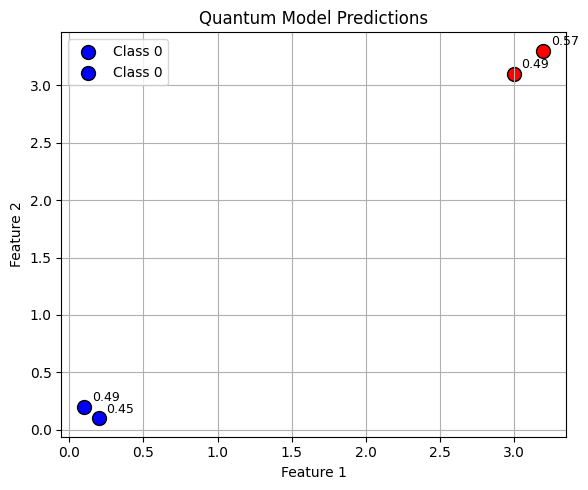

In [ ]:
# 9. 시각화

# 예측 결과 저장
preds = [model(x, weights) for x in X]

plt.figure(figsize=(6, 5))
for i, (x, y_true, y_pred) in enumerate(zip(X, Y, preds)):
    color = "blue" if y_true == 0 else "red"
    plt.scatter(x[0], x[1], c=color, s=100, edgecolors='k', label=f"Class {y_true}" if i < 2 else "")
    plt.text(x[0] + 0.05, x[1] + 0.05, f"{y_pred:.2f}", fontsize=9, color="black")

plt.title("Quantum Model Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##본다는 행위; 측정의 의미

양자 회로에서 “본다”, 즉 **큐비트를 관측한다(measure)**는 행위는 양자 상태를 고전적인 비트값(0 또는 1)으로 변환하는 과정으로 이해할 수 있겠습니다. 코드를 기준으로 보면, **관측을 명시적으로 수행하는 연산자(measurement operator)**를 사용하면 됩니다.

### PennyLane에서의 측정 방식

`확률(probabilities) 측정`: qml.probs(wires=[0]) # 각 상태(`

`기대값(expectation value) 측정`: qml.expval(qml.PauliZ(0)) # Z 방향으로 평균값 (-1~1)

`샘플링(measurement outcomes)`: qml.sample(wires=[0]). # 0 또는 1을 반환하는 실제 측정 결과




### 측정하기

- `qml.probs`: 개별 state들의 측정 확률 벡터입니다. $N$ qubit에 대해 $2^N$ 크기를 가집니다.
- `qml.expval`: Pennylane의 Observable들을 측정합니다. 기초적으로 `qml.PauliZ(i), qml.PauliX(i), qml.PauliY(i)`가 있으며 이들을 조합 하거나/여러개의 Observable을 측정할 수 있습니다.

###예: Bell 상태에서 한 큐비트만 측정하기

- shots=1로 설정하면 진짜 양자 측정처럼 단 한 번의 결과(0 or 1)가 나옵니다.

- 0번 큐비트를 측정하면 1번 큐비트의 상태도 자동으로 결정됩니다.

In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2, shots=1)  # shots=1로 실측 느낌 줌

@qml.qnode(dev)
def measure_one_qubit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=0)  # 0번 큐비트만 측정

result = measure_one_qubit()
print("0번 큐비트 관측 결과:", result)

0번 큐비트 관측 결과: 1


### 측정은 상태를 무너뜨린다 (Collapse)

관측된 순간, 양자 중첩 상태는 사라지고 → **한 가지 고전 상태로 “붕괴(collapse)”**됩니다.

- `큐비트를 본다`: qml.sample(wires=i)를 통해서 큐비트 i를 실제로 측정함.

- `중첩이 사라진다`: 코드 상에서 sample() 사용 시 상태가 0 또는 1 중 하나로 정해짐.

- `얽힌 상태 관측`: 코드상에서 두 큐비트를 동시에 sample() 하는 경우, 둘 사이의 상관관계 확인이 가능함.


# 경진대회 참가

## Fashion MINIST dataset

Fashion MNIST는 **기존 MNIST(손글씨 숫자)**를 대체하기 위해 등장한 의류 이미지 데이터셋입니다.

`데이터 수`: 학습 60,000장 / 테스트 10,000장

`입력 형태`: 28×28 크기의 흑백 이미지 (총 784차원)

`클래스 수`: 10개 (의류 종류)
- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

## 문제의 단순화

Mnist의 클래스는 위에서 설명한 것 처럼 10개의 클래스를 가지지만, 다중 클래스의 분류는 처음에 접근하기 쉽지 않기 때문에 먼저 **이진 분류(binary classification)**부터 시작하는 것이 좋습니다.

예를들어, T-shirt (0) vs Shirt (6)만 선택해 문제를 단순화 하는 것입니다.

## 데이터셋 확인

In [ ]:
# PyTorch의 메인 라이브러리(torch)를 불러옵니다.
# 텐서 생성, 연산, 모델 구축 등에 사용됩니다.
import torch

# Subset 클래스는 데이터셋의 일부만 선택하여 사용할 수 있게 해줍니다.
# 예: 전체 데이터셋 중 처음 100개 샘플만 사용하고 싶을 때 유용합니다.
from torch.utils.data import Subset

# DataLoader는 데이터셋을 배치 단위로 나누고, 셔플하거나 여러 스레드로 로딩할 수 있게 도와줍니다.
# 모델 학습에 필요한 반복 가능한 데이터 배치를 제공합니다.
from torch.utils.data import DataLoader

# torchvision은 이미지 관련 데이터셋(Fashion MNIST 등), 전처리(transform), 사전학습 모델 등을 제공합니다.
# 여기선 주로 datasets과 transforms를 사용할 수 있습니다.
import torchvision

이 코드는 FashionMNIST 데이터셋의 훈련용과 테스트용 데이터를 불러오고 전처리(transform)를 적용하는 부분입니다.

주요 전처리는:
- ToTensor: 이미지 → 텐서
- Normalize: 픽셀값을 **[-1, 1]**로 정규화

입니다.

In [ ]:
#  torchvision.transforms.Compose는 여러 개의 이미지 전처리(transform)를 순차적으로 적용할 수 있게 합니다.
# # 여기서는 ToTensor()와 Normalize()를 차례대로 적용합니다.
# transform = torchvision.transforms.Compose([

#     # 이미지를 PIL → PyTorch 텐서로 변환합니다.
#     # 결과는 [C, H, W] 형식의 float32 텐서로 바뀝니다. 값은 0~1 범위로 정규화됨.
#     torchvision.transforms.ToTensor(),

#     # 텐서 값을 정규화합니다. (mean=0.5, std=0.5)
#     # 결과적으로 픽셀 값은 [-1, 1] 범위로 변환됩니다.
#     torchvision.transforms.Normalize((0.5,), (0.5,))
# ])

# 학습 데이터의 다양성을 증가시켜 과적합 방지
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(15),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

# 훈련용 데이터셋을 불러옵니다.
# 루트 디렉토리 "./"에 저장하며, 없다면 자동으로 다운로드합니다.
# 위에서 정의한 transform을 적용합니다.
train_ds = torchvision.datasets.FashionMNIST(
    "./",                # 데이터 저장 경로
    train=True,          # 훈련용 데이터셋
    download=True,       # 데이터가 없으면 다운로드
    transform=transform  # transform 적용
)

# 테스트용 데이터셋을 불러옵니다.
# 위와 동일하지만 train=False를 통해 테스트셋을 불러옵니다.
test_ds = torchvision.datasets.FashionMNIST(
    "./",                # 데이터 저장 경로
    train=False,         # 테스트용 데이터셋
    download=True,       # 데이터가 없으면 다운로드
    transform=transform  # transform 적용
)

In [ ]:
# train_ds.targets는 각 샘플의 정답 클래스(0~9)들을 담고 있는 텐서입니다.
# 여기서 label이 0번(T-shirt/top) 또는 6번(Shirt)인 데이터만 선택합니다.
train_mask = (train_ds.targets == 0) | (train_ds.targets == 6)

# 위에서 만든 마스크(train_mask)가 True인 위치의 인덱스를 가져옵니다.
# 즉, label이 0 또는 6인 샘플의 인덱스만 추출합니다.
train_idx = torch.where(train_mask)[0]

# label이 6인 경우를 1로 변경합니다.
# → 이진 분류를 위해 0 vs 1로 만듭니다.
# 즉, T-shirt를 0, Shirt를 1로 분류하는 문제로 만듭니다.
train_ds.targets[train_ds.targets == 6] = 1

# 위에서 골라낸 인덱스(train_idx)를 사용해 훈련 데이터셋에서 0/1 클래스만 남깁니다.
# Subset을 사용하면 원본 데이터셋(train_ds)의 일부를 선택할 수 있습니다.
binary_train_ds = Subset(train_ds, train_idx)

train_loader는 훈련 루프에서 for data, label in train_loader: 와 같이 사용됩니다.

각 data는 1장의 이미지 텐서 ([1, 28, 28] 형태), 각 label은 0 또는 1의 정답 값입니다.

이 구조는 **양자 회로(QNode)**에 입력하거나 차원 축소 후 RY 게이트 등에 주입하기에 적합합니다.

In [ ]:
# PyTorch의 DataLoader를 이용해 binary_train_ds에서 데이터를 하나씩 꺼내도록 설정합니다.
train_loader = DataLoader(
    binary_train_ds,   # 이진 분류용으로 추출한 Subset (0 vs 1 클래스만 존재)
    batch_size=1,      # 배치 크기를 1로 설정 → 한 번에 한 이미지씩 학습
    shuffle=True       # 데이터를 섞어서 무작위 순서로 불러오도록 설정 (훈련 성능 향상)
)

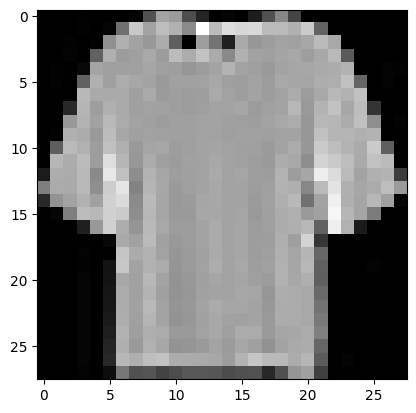

In [ ]:
# matplotlib의 pyplot 모듈을 불러옵니다. 시각화를 위한 기본 도구입니다.
from matplotlib import pyplot as plt

# binary_train_ds[20]은 21번째 샘플을 의미하며, (image_tensor, label)의 튜플입니다.
# binary_train_ds[20][0] → 이미지 텐서
# binary_train_ds[20][0][0] → 텐서에서 채널 차원(1개) 제거 → [28, 28] 크기의 2D 이미지
plt.imshow(binary_train_ds[20][0][0], cmap="grey")  # 흑백으로 이미지 출력

PyTorch의 train_loader에서 이진 분류용 이미지를 꺼내어 한 줄에 여러 장의 이미지와 해당 라벨을 시각화해보겠습니다.

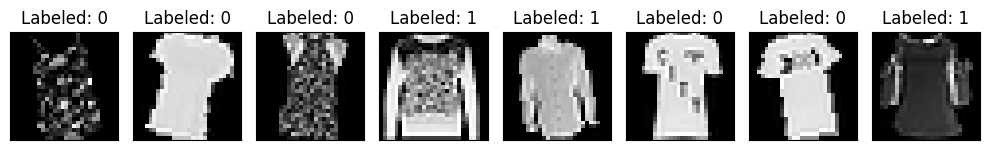

In [ ]:
# 한 번에 보여줄 샘플 수 설정
n_samples_show = 8

# train_loader에서 반복자(iterator) 생성
data_iter = iter(train_loader)

# 1행 n_samples_show열짜리 서브플롯 생성, 크기는 가로 10인치, 세로 3인치
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

# 서브플롯에 이미지를 하나씩 그려나감
while n_samples_show > 0:
    # 다음 배치에서 이미지와 라벨 하나를 가져옴 (batch_size=1이므로 1개씩 나옴)
    images, targets = next(data_iter)

    # 이미지 출력 (28x28), 채널 제거 후 NumPy로 변환
    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")

    # 축 눈금 제거
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])

    # 이미지 위에 라벨 텍스트 표시 (0 또는 1)
    axes[n_samples_show - 1].set_title(f"Labeled: {targets[0].item()}")

    # 카운트 감소
    n_samples_show -= 1

# 전체 레이아웃 자동 정렬
plt.tight_layout()
plt.show()

## 신경망 모델의 구성

이 구성 요소를 사용해서 CNN → 양자 회로 연결용 하이브리드 모델도 구성할 수 있습니다.

In [ ]:
# 모든 사용자 정의 신경망의 기본 클래스인 nn.Module을 불러옵니다.
# 사용자 정의 모델을 만들 때 반드시 이 클래스를 상속해야 합니다.
from torch.nn import Module
# PyTorch에서 제공하는 다양한 활성화 함수와 연산 함수(F.relu, F.softmax 등)를 포함한 모듈입니다.
# 모델 내 forward 함수에서 자주 사용됩니다.
import torch.nn.functional as F
# 2차원 합성곱 계층(Conv2D)을 불러옵니다.
# 주로 이미지 데이터를 처리하는 CNN에서 사용되며, 특징 맵(feature map)을 추출하는 데 쓰입니다.
from torch.nn import Conv2d, Dropout2d, Linear
# 여러 텐서를 차원 기준으로 이어붙일 수 있게 해주는 함수입니다.
# 예: cat((x1, x2), dim=1) → 두 텐서를 열 방향으로 연결
from torch import cat

이 모델은 CNN을 사용한 특징 추출기 위에 **양자 회로(QNN)**를 얹어서 하이브리드 이진 분류기를 구성하는 구조입니다.

`CNN`: 이미지 특징 추출 (Conv + Pool + FC)

`QNN`: 2D 출력값을 인코딩한 양자 회로 (얽힘 + RY 회전)

`결합 방식`: CNN → 2D 벡터 → QNN → scalar → FC → log softmax

`출력`: log(확률) 2차원 (클래스 0 / 클래스 1)


In [ ]:
# 기본 tensor의 dtype을 float64로 설정 (PennyLane은 float64 사용을 권장)
torch.set_default_dtype(torch.float64)

class BinaryClassifier(Module):
    def __init__(self):
        # PyTorch의 Module을 상속하여 사용자 정의 모델을 생성
        super().__init__()

        # 여기서 fc1 입력 크기(256)는 MaxPool2d 적용 후
        # 이미지 크기를 고려해서 조정해야 할 수 있음 (ex. 28x28 → 12x12 → flatten)
        self.conv1 = Conv2d(1, 2, kernel_size=5)     # 입력 채널 1 → 2채널, 커널 크기 5
        self.conv2 = Conv2d(2, 16, kernel_size=5)    # 2채널 → 16채널, 커널 크기 5
        self.dropout = Dropout2d()                   # 과적합 방지용 드롭아웃
        self.fc1 = Linear(256, 64)                   # 평탄화된 feature → 64차원
        self.fc2 = Linear(64, 2)                     # 64 → 2차원 (양자 회로 입력으로 축소)
        self.fc3 = Linear(1, 1)                      # QNN 출력값 후처리 (1 → 1)

        # Quantum layer
        self.q_device = qml.device("default.qubit", wires=2)  # 2 큐비트 시뮬레이터 사용
        self.qnn_params = Parameter(torch.rand(8), requires_grad=True)  # 학습 가능한 양자 파라미터
        self.obs = qml.PauliZ(0) @ qml.PauliZ(1)  # 두 큐비트의 Z-Z 관측 연산자

        #@qml.qnode(self.q_device)
        @qml.qnode(self.q_device, interface="torch")
        def circuit(x):
            # 입력 x의 두 값(2차원)으로 큐비트 상태를 인코딩하고 얽힘을 생성
            qml.H(wires=0)
            qml.H(wires=1)

            qml.RZ(2.*x[0], wires=0)
            qml.RZ(2.*x[1], wires=0)

            qml.CNOT(wires=[0, 1])
            qml.RZ(2.*(torch.pi - x[0])*(torch.pi - x[1]), wires=1)
            qml.CNOT(wires=[0, 1])

            # 파라미터화된 회로 (8개 가중치)
            # 총 8개의 RY 회전으로 구성된 파라미터화된 회로 (VQC 스타일)
	          # 얽힘 연산자(CNOT)를 사이사이에 배치
            qml.RY(2.*self.qnn_params[0], wires=0)
            qml.RY(2.*self.qnn_params[1], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2.*self.qnn_params[2], wires=0)
            qml.RY(2.*self.qnn_params[3], wires=1)
            qml.CNOT(wires=[1, 0])
            qml.RY(2.*self.qnn_params[4], wires=0)
            qml.RY(2.*self.qnn_params[5], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2.*self.qnn_params[6], wires=0)
            qml.RY(2.*self.qnn_params[7], wires=1)

            # Z⊗Z에 대한 기댓값을 출력 (값의 범위: -1 ~ 1)
            return qml.expval(self.obs)

        self.qnn = circuit  # forward에서 사용할 수 있도록 저장

    def forward(self, x):
        x = F.relu(self.conv1(x))        # conv1 + ReLU
        x = F.max_pool2d(x, 2)           # 2x2 max pooling
        x = F.relu(self.conv2(x))        # conv2 + ReLU
        x = F.max_pool2d(x, 2)           # 2x2 max pooling
        x = self.dropout(x)              # Dropout

        # x = x.view(-1)                   # flatten (1D 벡터로 펼치기)
        x = x.view(x.size(0), -1)        # (batch_size, feature_dim) 형태 유지

        x = F.relu(self.fc1(x))          # FC1 + ReLU
        x = torch.tanh(self.fc2(x)) * torch.pi  # shape: (batch_size, 2)

        # 양자 회로 입력 준비 (2차원 벡터 보장)
        x_input = x.view(-1)[:2]
        x = self.qnn(x_input).view(1,)  # 스칼라로 정리

        x = self.fc3(x)
        return torch.log_softmax(torch.cat([x, 1 - x], dim=-1), dim=-1)

PyTorch에서 학습 가능한 파라미터(Parameter) 클래스를 불러옵니다.
일반적으로 nn.Linear 등은 내부적으로 자동으로 Parameter를 사용하지만,
사용자가 직접 선언하고 학습시키고자 할 때 Parameter를 명시적으로 선언합니다.

이 코드에서는 **양자 회로 내에서 사용할 qnn_params**를 학습 가능하게 만들기 위해 사용합니다.

In [ ]:
from torch.nn.parameter import Parameter

이후, 학습·추론에 사용할 장치(device) 객체를 만듭니다.

torch.cuda.is_available() → 현재 머신에 CUDA-GPU가 설치·활성화되어 있으면 True 를 반환.
- ✅ True  → "cuda" (예: 'cuda:0')
- ❌ False → "cpu"

이렇게 하면 코드가 GPU 환경이든 CPU 환경이든 자동으로 호환됩니다.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 앞서 정의한 하이브리드 CNN + QNN 모델 인스턴스를 생성합니다.
# 내부에서 Conv2d, FC 레이어, 그리고 PennyLane QNode(양자회로)까지 모두 초기화됩니다.
bc = BinaryClassifier()

# 모델의 모든 학습 가능한 파라미터(가중치·버퍼)를 지정된 장치로 이동합니다.
bc.to(device)

BinaryClassifier(
  (conv1): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# ───── 학습 전에 회로 제약 먼저 점검 ─────
import pennylane as qml, torch

# 양자 회로의 입력용 더미 입력 벡터를 생성합니다.
# 길이가 2인 벡터이며, QNN 회로가 2차원 벡터를 입력으로 받는지 테스트하기 위함입니다.
# float64 타입으로 명시한 이유는: PennyLane의 내부 회로 및 Autograd 호환성 때문입니다.
dummy_x = torch.tensor([0.0, 0.0], dtype=torch.float64)
# qml.specs()는 PennyLane 회로의 리소스 분석기(resource estimator)입니다.
# bc.qnn는 사용자 정의 모델(BinaryClassifier)의 QNode (양자 회로)입니다.
# specs(...)는 해당 입력(dummy_x)을 바탕으로, 게이트 수, 얽힘 수, 회전 게이트 수,
# 깊이(depth), 측정 수, 입력 파라미터 수, 출력 수 등을 분석해 줍니다.
specs = qml.specs(bc.qnn)(dummy_x)

In [ ]:
specs

{'resources': Resources(num_wires=2, num_gates=18, gate_types=defaultdict(<class 'int'>, {'Hadamard': 2, 'RZ': 3, 'CNOT': 5, 'RY': 8}), gate_sizes=defaultdict(<class 'int'>, {1: 13, 2: 5}), depth=13, shots=Shots(total_shots=None, shot_vector=())),
 'errors': {},
 'num_observables': 1,
 'num_trainable_params': 8,
 'num_device_wires': 2,
 'num_tape_wires': 2,
 'device_name': 'default.qubit',
 'level': 'gradient',
 'gradient_options': {},
 'interface': 'torch',
 'diff_method': 'best',
 'gradient_fn': 'backprop'}

In [ ]:
assert specs["num_tape_wires"] <= 8,  "❌ 큐빗 수 초과"
assert specs['resources'].depth <= 30, "❌ 회로 깊이 초과"
assert specs["num_trainable_params"]<= 60, "❌ 학습 파라미터 수 초과"

print("✅ 회로 제약 통과 — 학습을 계속합니다")

✅ 회로 제약 통과 — 학습을 계속합니다


In [ ]:
len(train_loader) # 전체 배치 수 = 전체 데이터 수 ÷ 배치 크기를 의미합니다.

12000

PyTorch DataLoader에서 한 개의 배치를 꺼냄

In [ ]:
data, target = next(iter(train_loader))

print(data.shape)     # torch.Size([1, 1, 28, 28])
print(target)         # tensor([0]) 또는 tensor([1])

torch.Size([1, 1, 28, 28])
tensor([0])


시각화

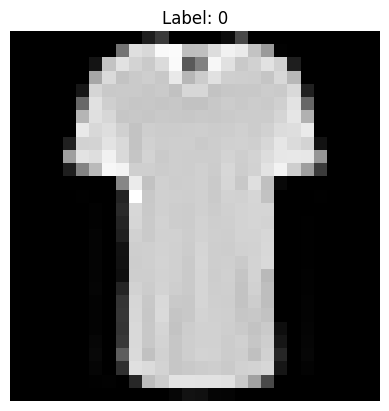

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].cpu().numpy(), cmap="gray")
plt.title(f"Label: {target.item()}")
plt.axis("off")
plt.show()

Adam 옵티마이저를 사용해 bc 모델의 파라미터를 학습시킵니다.
- bc.parameters()는 모델 내 학습 가능한 모든 파라미터(Conv, Linear, QNN 등 포함)를 반환합니다.
- lr=0.0001은 학습률(learning rate)로, 작은 값을 쓸수록 학습이 느리지만 안정적입니다.
- 양자 회로와 하이브리드 모델에서는 보통 lr=0.001보다 작게 설정하는 것이 좋습니다.

NLLLoss (Negative Log-Likelihood Loss) 함수는 log_softmax 출력값과 함께 쓰는 손실 함수입니다.
- 이진 분류지만, 출력이 log_softmax 형태의 두 클래스 확률 벡터일 경우 적절하게 작동합니다.
(출력이 [log(p0), log(p1)]일 때, 라벨은 0 또는 1 → OK)

In [ ]:
# PyTorch에서 제공하는 Adam 옵티마이저를 임포트합니다.
# Adam은 SGD(확률적 경사 하강법)의 변형으로, 학습 속도가 빠르고 안정적입니다.
# 학습률(lr), 베타 계수 등 다양한 하이퍼파라미터를 조절할 수 있습니다.
# 하이브리드 모델(CNN + QNN) 학습에도 매우 잘 작동합니다.
from torch.optim import Adam

# NLLLoss = Negative Log-Likelihood Loss (음의 로그 우도 손실)
# log_softmax를 출력으로 사용하는 모델에 적합한 손실 함수입니다.
# 예를 들어, 모델이 [log(p0), log(p1)] 형태의 로그 확률을 출력할 때 사용합니다.
# 라벨(target)은 정수 클래스 인덱스(예: 0, 1)로 전달되어야 합니다.
from torch.nn import NLLLoss

optimizer = Adam(bc.parameters(), lr=0.0001)
loss_func  = NLLLoss()

# 학습을 몇 번 반복할지 설정합니다.
# 실제 사용에선 5~50 epochs 정도 사용하면 더 안정적인 학습이 됩니다.
epochs = 20
loss_history = []

# PyTorch 모델을 **“훈련 모드(train mode)”**로 전환합니다.
# Dropout, BatchNorm 등 레이어들이 학습용 동작을 하게 됩니다.
bc.train()

BinaryClassifier(
  (conv1): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
data.shape

torch.Size([1, 1, 28, 28])

In [ ]:
from tqdm import tqdm

# 학습 루프
for epoch in range(epochs):
    # tqdm으로 에폭의 진행 상황을 상태바로 표시
    epoch_bar = tqdm(range(len(train_loader)),
                     desc=f"Epoch {epoch+1}/{epochs}",
                     leave=False)  # leave=False면 다음 에폭에 덮어쓰기

    total_loss = []

    # zip을 사용하여 tqdm 바와 train_loader 데이터를 동시에 반복
    for bidx, (data, target) in zip(epoch_bar, train_loader):

        # # GPU 사용 시 데이터도 device로 이동
        # data, target = data.to(device), target.to(device)

        # 옵티마이저 초기화 (기울기 초기화)
        optimizer.zero_grad(set_to_none=True)

        # 모델 추론
        output = bc(data)

        # 손실 함수 계산 (target은 [1] → 1 형태로 만들기 위해 squeeze())
        loss = loss_func(output, target.squeeze())

        # 손실 값 기록 (그래프용)
        total_loss.append(loss.item())

        # 역전파 (기울기 계산)
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # 일정 간격마다 현재 배치와 손실을 tqdm에 표시
        if bidx % 100 == 0:
            epoch_bar.set_postfix(batch=bidx,
                                  loss=f"{loss.item():.4f}")

    # 에폭 종료 후 평균 손실 저장
    avg_loss = sum(total_loss) / len(total_loss)
    loss_history.append(avg_loss)

    # 한 줄 요약 로그 출력
    print(f"Training [{100.0 * (epoch+1)/epochs:.0f}%] "
          f"Average Loss: {avg_loss:.4f}")

Training [5%] Average Loss: 0.7329


Training [10%] Average Loss: 0.4855


Training [15%] Average Loss: 0.4572


Training [20%] Average Loss: 0.4392


Training [25%] Average Loss: 0.4272


Training [30%] Average Loss: 0.4182


Training [35%] Average Loss: 0.4089


Training [40%] Average Loss: 0.4060


Training [45%] Average Loss: 0.4004


Training [50%] Average Loss: 0.3913


Training [55%] Average Loss: 0.3867


Training [60%] Average Loss: 0.3741


Training [65%] Average Loss: 0.3756


Training [70%] Average Loss: 0.3711


Training [75%] Average Loss: 0.3672


Training [80%] Average Loss: 0.3618


Training [85%] Average Loss: 0.3636


Training [90%] Average Loss: 0.3551


Training [95%] Average Loss: 0.3561


Epoch 20/20:  20%|█▉        | 2351/12000 [00:47<03:01, 53.06it/s, batch=2300, loss=0.1904]

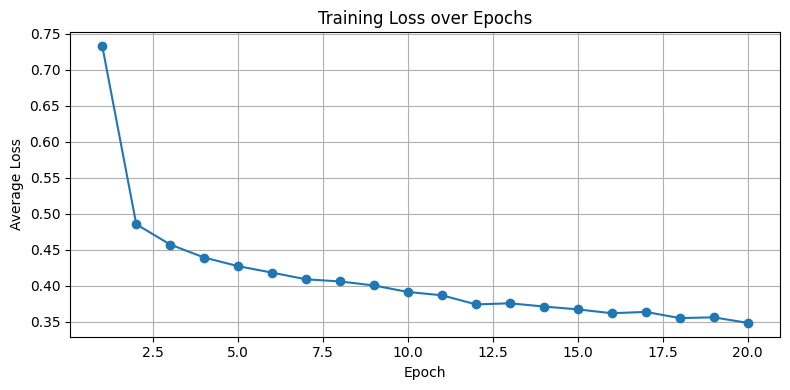

In [ ]:
# 모든 에폭 종료 후 손실 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), loss_history, marker='o', linestyle='-')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

## 모델 추론

테스트용 DataLoader를 기반으로 **양자-클래식 하이브리드 모델 bc**에 대해 추론을 수행하고 예측값과 실제값을 수집하는 과정

In [ ]:
from datetime import datetime  # 시간 기록용 (현재 코드에서는 사용 X)

# 테스트 데이터셋을 로딩하는 DataLoader 생성
test_loader = DataLoader(
    test_ds,            # FashionMNIST 테스트셋
    batch_size=1,       # 한 번에 1개 샘플씩 처리
    shuffle=False       # 평가 시에는 보통 순서 유지 (랜덤 셔플 X)
)

bc.eval()  # 모델을 평가 모드로 전환 (dropout 등 비활성화)

all_preds, all_targets = [], []  # 예측값과 실제 정답값을 저장할 리스트 초기화

with torch.no_grad():  # 추론 시에는 그래디언트 계산을 비활성화 (속도/메모리 효율 ↑)
    for data, target in tqdm(
        test_loader,                 # test 데이터셋을 순차적으로 읽음
        desc="Inference",            # tqdm 상태바 제목
        total=len(test_loader),      # 총 배치 수 설정
        leave=False                  # 상태바 덮어쓰기 (깔끔한 출력)
    ):
        # 데이터를 GPU(CUDA) 또는 CPU로 이동
        data, target = data.to(device), target.to(device)

        # 모델을 사용해 추론 결과(logits)를 얻음
        logits = bc(data)  # log_softmax(logits) 형태로 출력됨, shape: [1, 2]

        # logits에서 가장 큰 값을 갖는 인덱스를 예측값으로 설정
        pred = logits.argmax().view(1)  # 예: [0.3, 0.7] → pred = [1]

        # 예측값과 실제값을 CPU로 옮겨서 리스트에 저장
        all_preds.append(pred.cpu())               # 예측값
        all_targets.append(target.view(-1).cpu())  # 정답값 (batch 차원 유지)

# 리스트로 모은 예측값과 정답값을 텐서로 연결하고 numpy 배열로 변환
y_pred = torch.cat(all_preds).numpy().astype(int)     # 예측값 전체
y_true = torch.cat(all_targets).numpy().astype(int)   # 실제 정답 전체

 ## 평가 및 결과 저장

### 평가 지표 출력

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4))


Accuracy: 0.1144
[[714 286   0   0   0   0   0   0   0   0]
 [570 430   0   0   0   0   0   0   0   0]
 [ 30 970   0   0   0   0   0   0   0   0]
 [564 436   0   0   0   0   0   0   0   0]
 [ 10 990   0   0   0   0   0   0   0   0]
 [371 629   0   0   0   0   0   0   0   0]
 [101 899   0   0   0   0   0   0   0   0]
 [333 667   0   0   0   0   0   0   0   0]
 [176 824   0   0   0   0   0   0   0   0]
 [ 28 972   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0     0.2465    0.7140    0.3664      1000
           1     0.0605    0.4300    0.1061      1000
           2     0.0000    0.0000    0.0000      1000
           3     0.0000    0.0000    0.0000      1000
           4     0.0000    0.0000    0.0000      1000
           5     0.0000    0.0000    0.0000      1000
           6     0.0000    0.0000    0.0000      1000
           7     0.0000    0.0000    0.0000      1000
           8     0.0000    0.0000    0.0000      1000
           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 평가 지표 시각화

혼동 행렬(Confusion Matrix):
- 실제 클래스와 예측 클래스의 비교를 통해 얼마나 정확하게 분류했는지 확인할 수 있습니다.
- 정확도(Accuracy)는 약 90%로 나타났습니다 (실제 상황에서는 여러분의 모델 출력으로 대체해야 함).

분류 리포트 (Classification Report):
- Precision, Recall, F1-score를 시각화하여 각 클래스의 성능을 정량적으로 확인할 수 있습니다.

<Figure size 600x500 with 0 Axes>

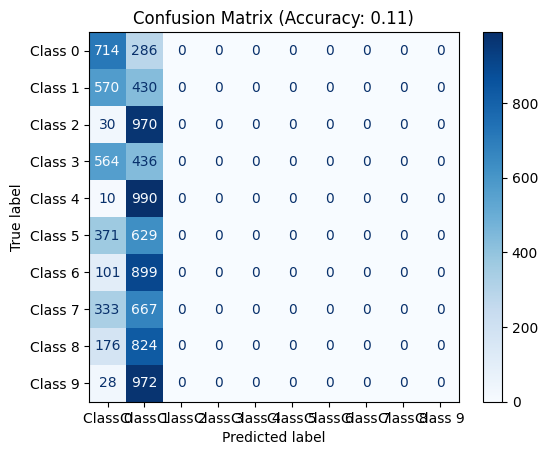

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


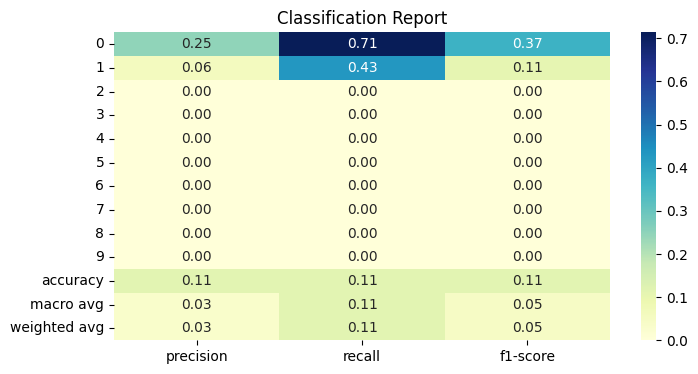

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import pandas as pd

# 실제 사용된 클래스 라벨 추출 (예: [0, 6])
labels = sorted(set(y_true) | set(y_pred))
label_names = [f"Class {lbl}" for lbl in labels]

# 혼동 행렬 계산
cm = confusion_matrix(y_true, y_pred, labels=labels)
accuracy = accuracy_score(y_true, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# 분류 리포트 시각화
report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # 마지막 row 'accuracy' 제외

plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classification Report")
plt.show()

### 잘못 분류된 이미지의 시각화

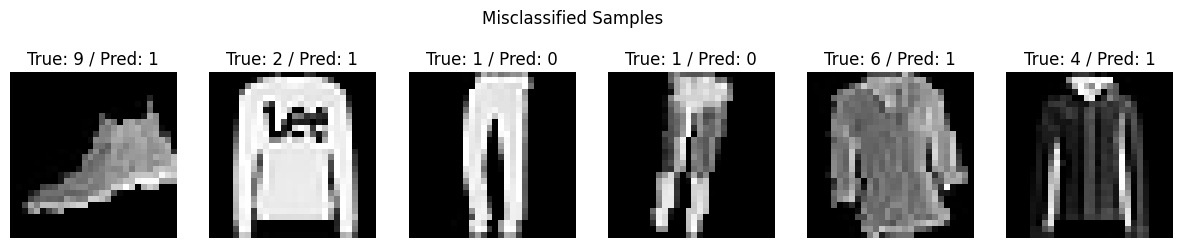

In [ ]:
import torch

# 잘못 분류된 인덱스 추출
misclassified_idx = [i for i in range(len(y_true)) if y_true[i] != y_pred[i]]

# 시각화 (최대 6개)
n_show = min(6, len(misclassified_idx))
fig, axes = plt.subplots(1, n_show, figsize=(15, 3))

for i in range(n_show):
    idx = misclassified_idx[i]
    # 예: test_ds[idx][0][0] → 이미지 텐서, test_ds[idx][1] → 라벨
    image_tensor = test_ds[idx][0][0]  # [채널][H][W]

    axes[i].imshow(image_tensor.numpy(), cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"True: {y_true[idx]} / Pred: {y_pred[idx]}")

plt.suptitle("Misclassified Samples")
plt.show()

### 결과 저장

In [ ]:
# 0·6 라벨만 평가
test_mask = (y_true == 0) | (y_true == 6)

print("total samples:", len(y_true))
print("target samples:", test_mask.sum())

# 모델 결과가 1인 것을 6으로 변경
y_pred_mapped = np.where(y_pred == 1, 6, y_pred)

acc = (y_pred_mapped[test_mask] == y_true[test_mask]).mean()
print(f"accuracy (labels 0/6 only): {acc:.4f}")

# 현재 시각을 "YYYYMMDD_HHMMSS" 형식으로 포맷팅
now = datetime.now().strftime("%Y%m%d_%H%M%S")

# 원본 파일명을 기반으로 새 파일명 생성
y_pred_filename = f"y_pred_{now}.csv"

np.savetxt(y_pred_filename, y_pred_mapped, fmt="%d")

total samples: 10000
target samples: 2000
accuracy (labels 0/6 only): 0.8065


## 모델 추론 결과 파일 다운로드

자동으로 다운로드되는 파일을 [제출하기](https://aifactory.space/task/9154/submit) 페이지에 업로드하면 자동으로 채점이 되며 정상적으로 채점이 된다면 리더보드에서 자기점수를 확인할 수 있습니다.


In [1]:
from google.colab import files

files.download(y_pred_filename)

NameError: name 'y_pred_filename' is not defined